### Flavia Carravieri
# <span style="color:deeppink"> NSL - ESERCITAZIONE 3</span>

La Teoria di Black-Scholes assume che l'evoluzione temporale dei prezzi degli asset è stocastica e segue un moto browniano con un tasso di interesse *risk-free* costante, $r$, e volatilità $\sigma$.

Nota la soluzione analitica per il prezzo delle opzioni europee al tmepo t<T
- per la call-option $ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $
- per la put-option $ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$

dove 
- $d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$
- $d_2 = d_1 - \sigma\sqrt{T-t}$
- $ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$ - cumulativa della gaussiana $\sim \mathcal{N}(\mu=0,\sigma^2=1)$ - e ${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$

Dal fatto che un $\textit{asset\ price}$ $S\sim GBM(\mu,\sigma^2)$, segue che 
$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
dove $W(t)\sim\mathcal{N}(0,t)$, moto browniano standard. 
Inoltre, poichè gli incremenit di $W$ sono distribuiti normalmente, esso può essere discretizzato con la formula ricorsiva $W(t_{i+1})=W(t_{i})+Z_{i+1}\sqrt{t_{i+1}-t_{i}}$, dove $Z_i \sim \mathcal{N}(0,1)$. Perciò
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
La discretizzazione è esatta nel senso che la distribuzione congiunta dei valori simulati, coincide con quella del corrispondente moto browniano.



### Esercizio 3.1
Fissando i seguenti parametri:
- asset price in $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatilità: $\sigma=0.25$

si sono calcolati i prezzi delle opzioni al tempo T sia campionando direttamente il prezzo finale dell'asset, $S(T)$, sia campionando il $GBM(r,\sigma^2)$ discretizzato dividendo l'intervallo $[0,T]$ in $10^2$ sottointervalli.

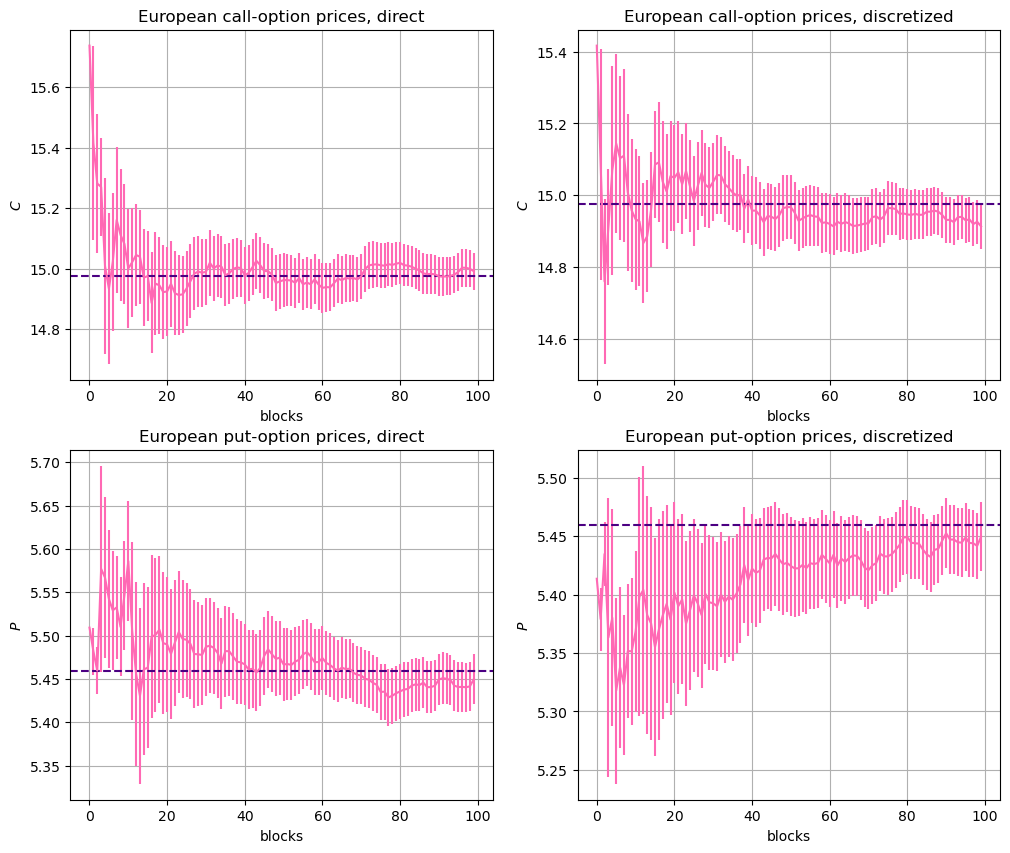

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

call_direct=np.loadtxt('call_direct.out', usecols=(0))
err_call_dir=np.loadtxt('call_direct.out', usecols=(1))
call_discrete=np.loadtxt('call_discrete.out', usecols=(0))
err_call_discr=np.loadtxt('call_direct.out', usecols=(1))

put_direct=np.loadtxt('put_direct.out', usecols=(0))
err_put_dir=np.loadtxt('put_direct.out', usecols=(1))
put_discrete=np.loadtxt('put_discrete.out', usecols=(0))
err_put_discr=np.loadtxt('put_direct.out', usecols=(1))

x=np.arange(100)

#fig, (F1, F2) = plt.subplots(1, 2, figsize=(14, 5))
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0,0].errorbar(x, call_direct, yerr=err_call_dir, color='hotpink')
axs[0,0].axhline(y=14.975790778311286, color='indigo', linestyle='--', linewidth=1.5) 
axs[0,0].set_title('European call-option prices, direct')
axs[0,0].set_xlabel('blocks')
axs[0,0].set_ylabel(r'$C$')
axs[0,0].grid()

axs[0,1].errorbar(x, call_discrete, yerr=err_call_discr, color='hotpink')
axs[0,1].axhline(y=14.975790778311286, color='indigo', linestyle='--', linewidth=1.5) 
axs[0,1].set_title('European call-option prices, discretized')
axs[0,1].set_xlabel('blocks')
axs[0,1].set_ylabel(r'$C$')
axs[0,1].grid()


axs[1,0].errorbar(x, put_direct, yerr=err_put_dir, color='hotpink')
axs[1,0].axhline(y=5.4595325819072364, color='indigo', linestyle='--', linewidth=1.5) 
axs[1,0].set_title('European put-option prices, direct')
axs[1,0].set_xlabel('blocks')
axs[1,0].set_ylabel(r'$P$')
axs[1,0].grid()

axs[1,1].errorbar(x, put_discrete, yerr=err_put_discr, color='hotpink')
axs[1,1].axhline(y=5.4595325819072364, color='indigo', linestyle='--', linewidth=1.5) 
axs[1,1].set_title('European put-option prices, discretized')
axs[1,1].set_xlabel('blocks')
axs[1,1].set_ylabel(r'$P$')
axs[1,1].grid()

plt.show()

#così non funziona - ho risolto? mi sembra che ora funzioni e non mi ricordo perchè lo avevo scritto 



I grafici mostrano l'andamento dei prezzi delle opzioni, con relative incertezze, in funzione del numero di blocchi usato per il data blocking, in questo caso 100 blocchi da 1000 valori l'uno. Tratteggiati in viola, sono riportati i valori analitici ottenuti da Black e Scholes: $C[S(t),t]=14.975790778311286$ e $CP[S(t),t]=5.4595325819072364$. 

Si osserva che in entrambi i casi, calcolo diretto e calcolo discretizzato, si ottengono valori compatibili con quelli attesi, a dimostrazione del fatto che la simulazione è uno strumento efficace per approcciare questo tipo di problemi che nella maggior parte dei casi non hanno soluzioni an analitiche, data la loro complessità. 